## BIA Bob demo
BIA Bob is a Jupyter-magic based assistant for interacting with data via code

In [1]:
from bia_bob import bob

You can use the `%bob` single-line or the `%%bob` multi-line magic to ask for programming image analysis tasks and `bob` will do it for you.

In [2]:
%bob Load the blobs.tif image file and show it.

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
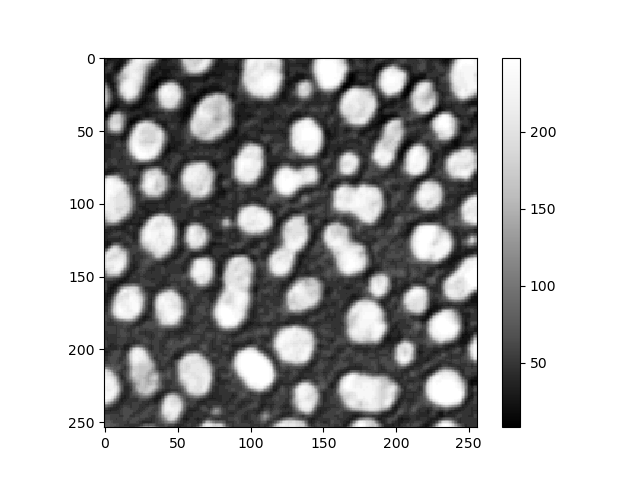
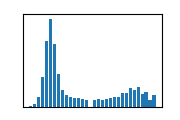

In [3]:
# Import required modules
from skimage.io import imread
import stackview
import pyclesperanto_prototype as cle

# Example data, todo: Replace these with your data
image_path = 'blobs.tif'

# Load the image
image = imread(image_path)

# Display the image
stackview.insight(image)

In [4]:
%%bob
Load the blobs.tif grayscale image from disc.
Segment the nuclei-like objects in it using 
Otsu's method and connected component labeling.
Measure area of the segmented labels.
Print the area on top of the labels.

StackViewNDArray(<Figure size 1000x1000 with 1 Axes>, dtype=object)

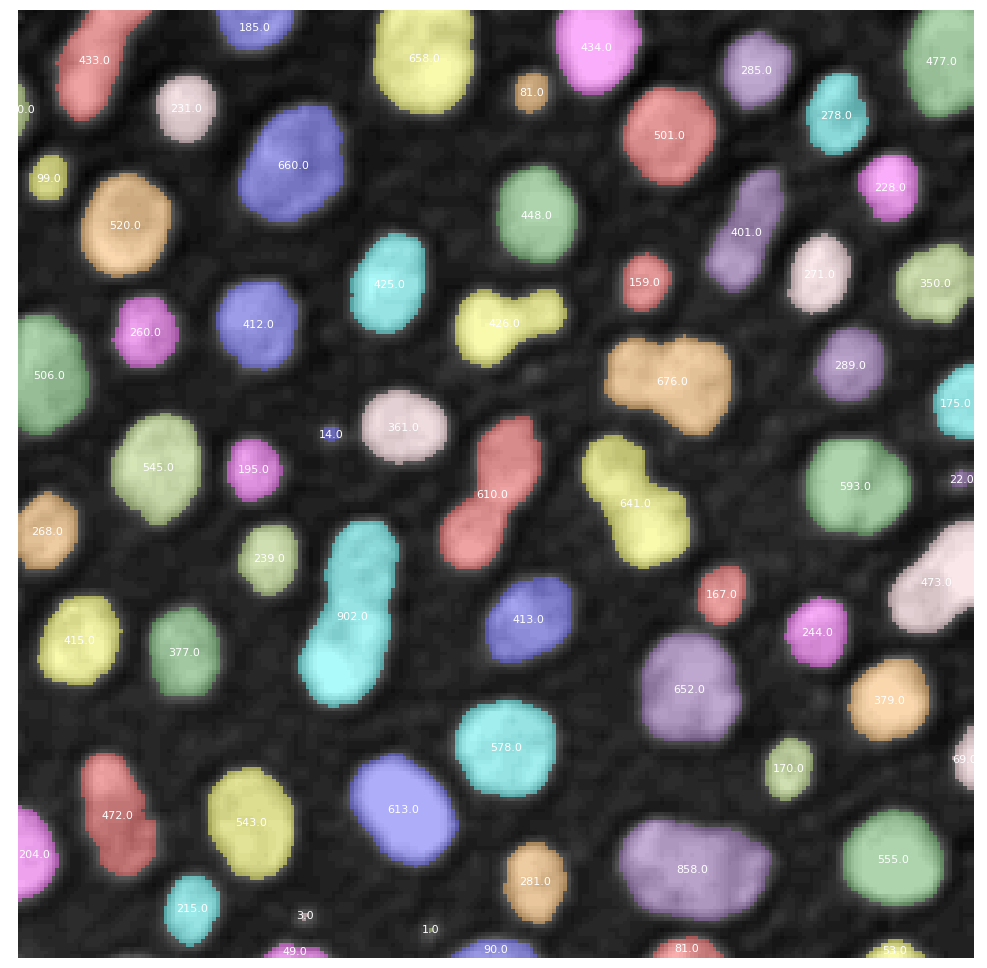

In [5]:
import numpy as np
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import matplotlib.pyplot as plt

# Example data, todo: Replace these with your data
image_path = 'blobs.tif'

# Load the image
image = imread(image_path)

# Apply Otsu's thresholding
threshold = threshold_otsu(image)
binary = image > threshold

# Perform connected component labeling
labels = label(binary)

# Measure area of segmented labels
props = regionprops(labels)

# Create an RGB image with labels
image_label_overlay = label2rgb(labels, image=image, bg_label=0)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the label overlay
ax.imshow(image_label_overlay)

# Print area on top of the labels
for prop in props:
    y, x = prop.centroid
    area = prop.area
    ax.text(x, y, f'{area}', color='white', fontsize=8, ha='center', va='center')

# Remove axis ticks
ax.set_axis_off()

# Show the plot
plt.tight_layout()
stackview.insight(fig)

In [6]:
%%bob
Take the segmented labeled_image and expand the labels by 4 pixels. Show the resulting label image alone.

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
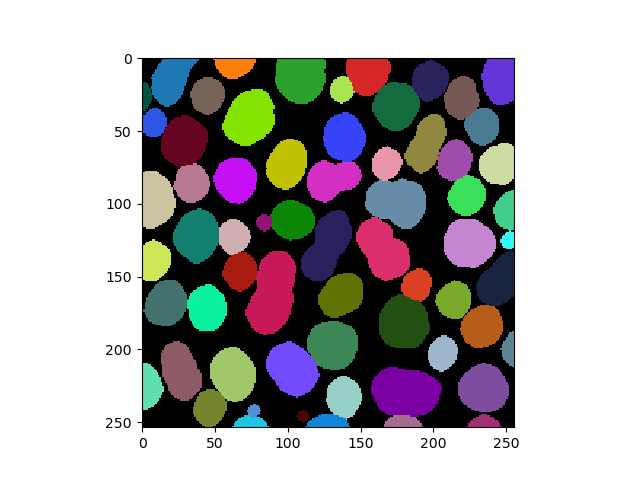

In [7]:
from skimage.segmentation import expand_labels

# Example data, todo: Replace these with your data
labeled_image = labels  # Assuming 'labels' is the segmented image from the previous step

# Expand the labels
expanded_labels = expand_labels(labeled_image, distance=4)

# Display the expanded label image
stackview.insight(expanded_labels)